<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Semanal Nº6 - TS6
#### Tomás Altimare Bercovich

# Resumen
El trabajo semanal consistió en realizar un análisis sobre las funciones transferencia de segundo orden, buscando comparar sus respuestas en frecuencia con respecto al módulo, fase, retardo de fase, polos y ceros de diferentes funciones. 

# Introducción Teórica


# Análisis y Desarrollo
Se comenzó planteando el siguiente circuito RLC:

<center><img src="./TS6_consigna.png" width="500" /> <center>

Para el cual se buscó demostrar que la función transferencia:
\begin{equation}
T(s) = \frac{V2}{V1}
\end{equation}
Se corresponde con una sección bicuadrática (SOS) del tipo:
\begin{equation}
T(s) = \frac{s^2 + s \frac{Woz}{Qz} + Woz^2}{s^2 + s \frac{Wop}{Qp} + Wop^2}
\end{equation}
Por lo que se realizó el siguiente procedimiento a partir de las admitancias del circuito:
<center><img src="./TS6_ejercicio_1.jpg" width="500" /><center>

A partir de la SOS, se parametrizó el polinomio en función de las variables del circuito anteriormente planteado, llegando a:
<center><img src="./TS6_ejercicio_2.jpg" width="500" /><center>

Luego, se plantearon las siguientes funciones transferencia:
\begin{equation}
T1(s) = \frac{s^2 + 9}{s^2 + s \sqrt{2} + 1}
\end{equation}
\begin{equation}
T2(s) = \frac{s^2 + 1/9}{s^2 + s/5 + 1}
\end{equation}
\begin{equation}
T3(s) = \frac{s^2 + s/5 + 1}{s^2 + s \sqrt{2} + 1}
\end{equation}

Con el objetivo de calcular y graficar sus respuestas en módulo, fase, retardo de grupo, polos y ceros, se diagramó la siguiente función:

In [15]:
#%% Importo los módulos y bibliotecas que voy a utilizar
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy import signal as sig 

#%%#########################
## Funciones del Programa ##
############################
def plotear_funcion_transferencia(a, b, xlim = (0, 10), label = 'T(s)', xlim_s = False, polos_y_ceros = True, magnitud_fase_retardo = True, fig_inicial = 0):
    # --- Calculo polos y ceros ---
    z, p, k = sig.tf2zpk(b, a) # Zpk = [ [z0,z1,...,zn], [p0,p1,...,pn], k]

    # --- Módulo, Fase y Retardo de Fase ---
    w, h = sig.freqs(b, a) # worN = np.logspace(2,-2,1000)
    phase = np.unwrap(np.angle(h)) # fase del grupo
    gd = -np.diff(phase) / np.diff(w) # retardo

    # --- Ploteo ---
    figura = 1
    if magnitud_fase_retardo == True:
        # Magnitud
        plt.figure(fig_inicial + figura)
        plt.title(f'Figura {fig_inicial + figura}: Respuesta en Magnitud')
        plt.xlabel('Pulsación angular [r/s]')
        plt.ylabel('|H(jω)| [dB]')
        plt.plot(w, 20*np.log10(abs(h)), label = f"{label}")
        if xlim_s == True: plt.xlim(xlim)
        plt.grid(True, which='both', ls=':')
        plt.legend()
        figura+=1
    
        # Fase
        plt.figure(fig_inicial + figura)
        plt.title(f'Figura {fig_inicial + figura}: Respuesta de Fase')
        plt.xlabel('Pulsación angular [r/s]')
        plt.ylabel('Fase [°]')
        plt.plot(w, np.degrees(phase), label = f"{label}")
        if xlim_s == True: plt.xlim(xlim)
        plt.grid(True, which='both', ls=':')
        plt.legend()
        figura+=1
        
        # Retardo de grupo
        plt.figure(fig_inicial + figura)
        plt.title(f'Figura {fig_inicial + figura}: Retardo de Grupo')
        plt.xlabel('Pulsación angular [r/s]')
        plt.plot(w[:-1], gd, label = f"{label}")
        plt.ylabel('τg [s]')
        if xlim_s == True: plt.xlim(xlim)
        plt.grid(True, which='both', ls=':')
        plt.legend()
        figura+=1

    # Diagrama de polos y ceros
    if polos_y_ceros == True:
        plt.figure(fig_inicial + figura, figsize = (5,5))
        plt.title(f'Figura {fig_inicial + figura}: Diagrama de Polos y Ceros de {label}  (plano s)')
        plt.xlabel('σ [rad/s]')
        plt.ylabel('jω [rad/s]')
        plt.plot(np.real(p), np.imag(p), 'x', markersize=10, label= f'Polos de {label}')
        if len(z) > 0:
            plt.plot(np.real(z), np.imag(z), 'o', markersize=10, fillstyle='none', label=f'Ceros de {label}')
        plt.axhline(0, color='k', lw=0.5)
        plt.axvline(0, color='k', lw=0.5)
        # Grafico el circulo unitario
        unit_circle = patches.Circle((0, 0), radius=1, fill=False,
                             color='gray', ls='dotted', lw=2)
        axes_hdl = plt.gca()
        axes_hdl.add_patch(unit_circle)

        plt.axis([-1.1, 1.1, -1.1, 1.1])
        plt.legend()
        plt.grid(True)

A partir de la misma se realizaron gráficos de respuesta comparando las distintas funciones transferencia. Primero se armaron los vectores con los coeficientes b y a, correspondientes al polinómio P(s) y el segundo a Q(s), respectivamente. Luego, se ingresadon dentro de la función antes mencionada, donde a partir del conversor tf2zpk se obtuvieron los polos y ceros, llegando a los siguientes gráficos:

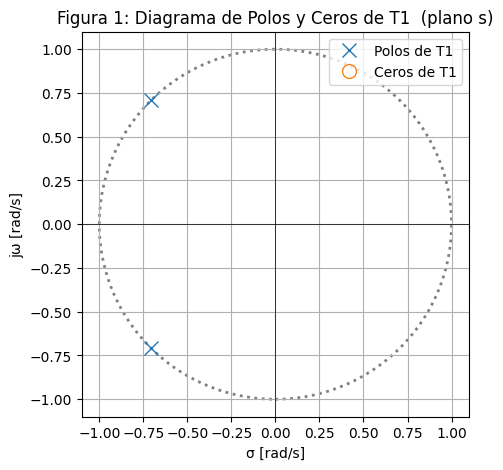

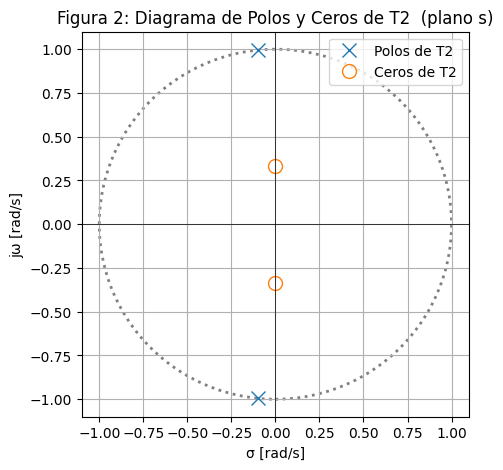

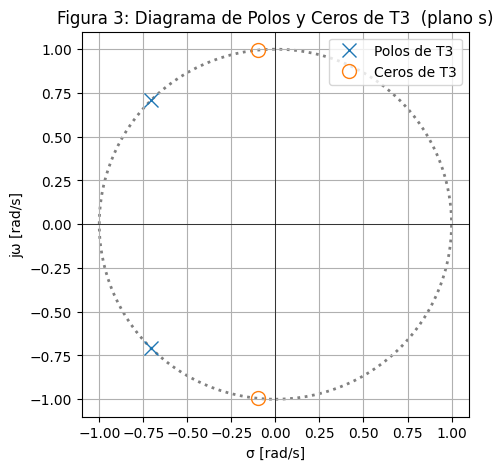

In [16]:
# %% Armo las funciones Transferencia
b1 = [1, 0, 9]
a1 = [1, np.sqrt(2), 1]

b2 = [1, 0, (1/9)]
a2 = [1, (1/5), 1]

b3 = [1, (1/5), 1]
a3 = [1, np.sqrt(2), 1]

# %% Ploteo los polos y ceros
plotear_funcion_transferencia(a1, b1, label = 'T1', magnitud_fase_retardo = False)
plotear_funcion_transferencia(a2, b2, label = 'T2', magnitud_fase_retardo = False, fig_inicial = 1)
plotear_funcion_transferencia(a3, b3, label = 'T3', magnitud_fase_retardo = False, fig_inicial = 2)


Empezando por la primer función, es interesante observar como los ceros en -3i y 3i no figuran: esto se debe a que se encuentran por fuera del radio unitario, por lo que se puede preveer que la respuesta en frecuencia de la fase no será plana. Por otro lado, se puede observar, los polos de las tres funciones se encuentran en el semiplano izquierdo, lo que quiere decir que son sistemas estables.

Por otro lado, graficaron las respuestas de módulo, fase y retardo de fase, llegando a los siguientes gráficos:

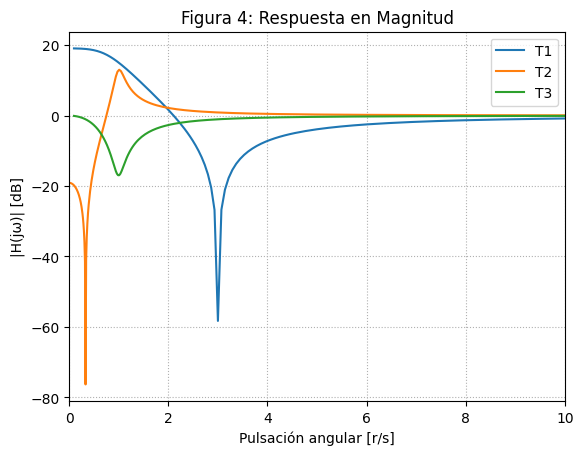

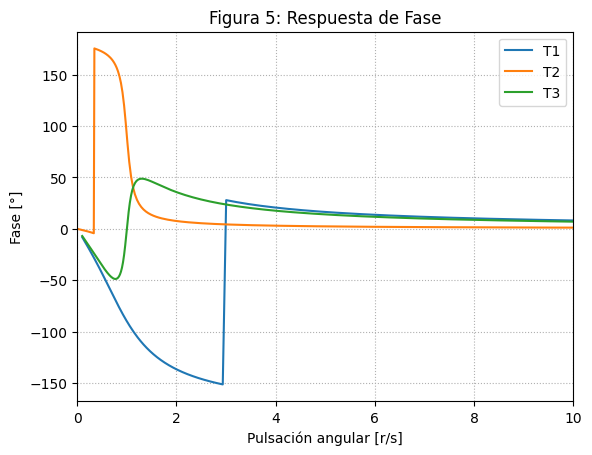

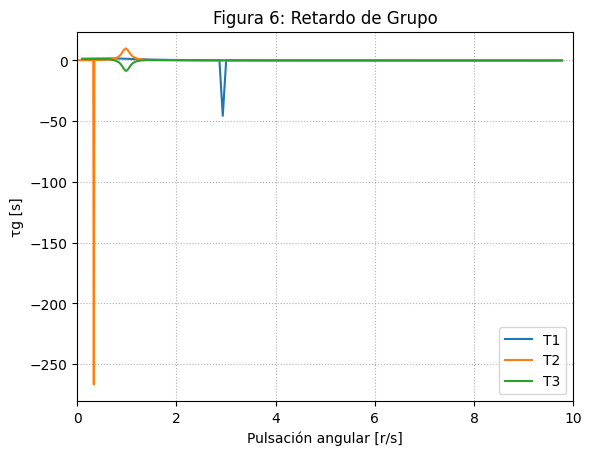

In [17]:
# %% Ploteo magnitud, fase y retardo de grupo
plotear_funcion_transferencia(a1, b1, label = 'T1', xlim = (0, 10), xlim_s = True, polos_y_ceros = False, fig_inicial = 3)
plotear_funcion_transferencia(a2, b2, label = 'T2', xlim = (0, 10), xlim_s = True, polos_y_ceros = False, fig_inicial = 3)
plotear_funcion_transferencia(a3, b3, label = 'T3', xlim = (0, 10), xlim_s = True, polos_y_ceros = False, fig_inicial = 3)

Como puede verse, según fue anticipado anteriormente, la función T1 es de las tres, la que más tarda en estabilizarse (posiblemente, debido a sus ceros fuera del radio unitario). Aún así, logra estabilizarse asintóticamente al igual que el resto de las funciones.
Por otro lado, es interesante comparar la T1 con la T3, debido a que tienen los mismos polos y diferentes ceros: como puede observarse en los gráficos, ambas respuestas son muy similares, pero la T1 muestra claros retardos en comparación a la T3. A la vez, la T1 muestra cambios de fase más abruptos

# Conclusión


# Autoevaluación del Desarrollo


# Bilbiografía


# Anexo
